# Load packages

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Compare results for fishing vessels, cargo and tankers, and fishing, cargo, and tankers

## Epoch level learning curves

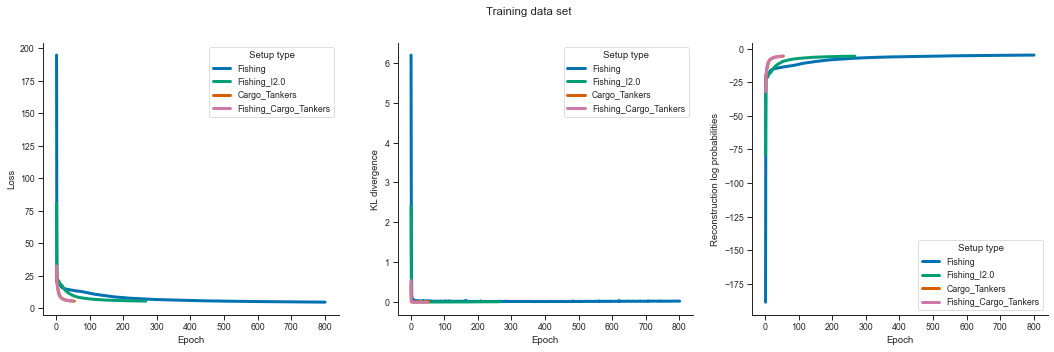

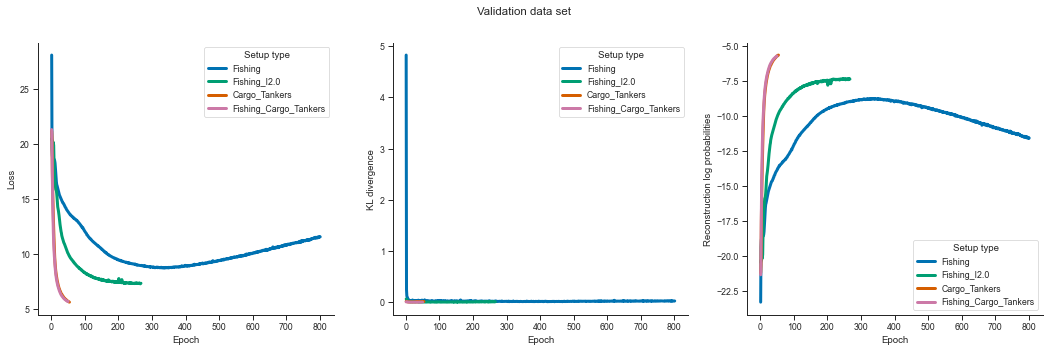

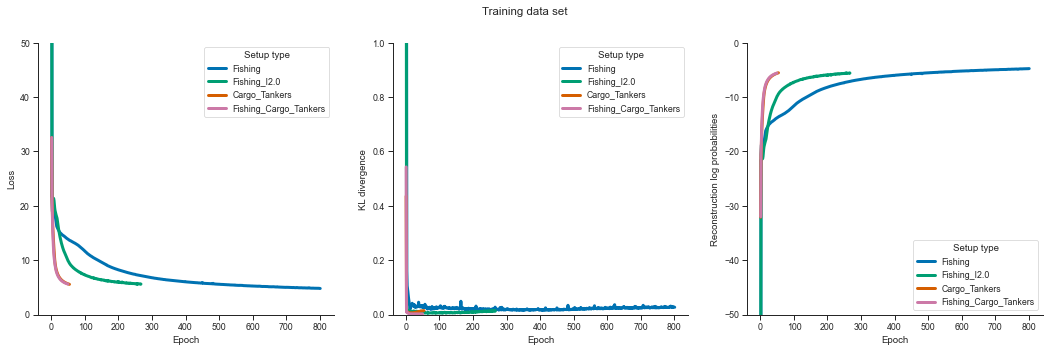

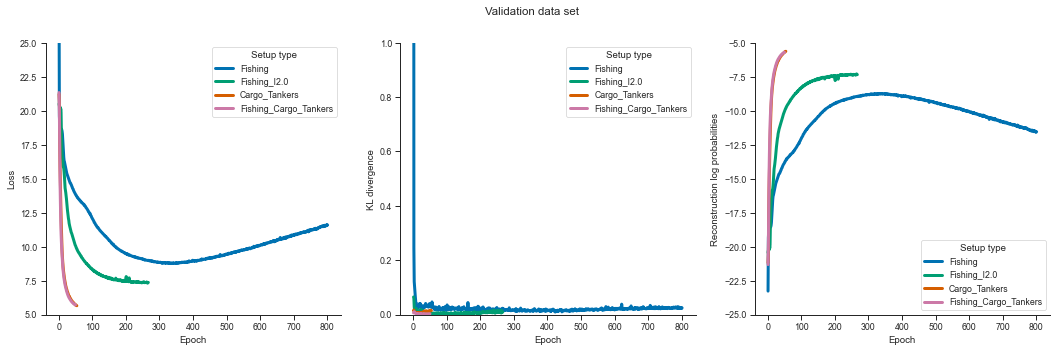

In [2]:
# Use the SummaryModels class
setup_type = "Fishing"
summary_models_fish = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600")
df_default_fish = summary_models_fish.load_curves_df(setup_type)
df_track_lvl_fish = summary_models_fish.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"] 

setup_type = "Fishing_I2.0"
summary_models_fish_i20 = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600", inject_cargo_proportion= 2.0)
df_fish_i20 = summary_models_fish_i20.load_curves_df(setup_type)
df_track_lvl_fish_i20 = summary_models_fish_i20.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"]

setup_type = "Cargo_Tankers"
summary_models_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_CargTank_14400_86400_600")
df_default_carg_tank = summary_models_carg_tank.load_curves_df(setup_type)
df_track_lvl_carg_tank = data = summary_models_carg_tank.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"] 

setup_type = "Fishing_Cargo_Tankers"
summary_models_fish_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600")
df_default_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df(setup_type)
df_track_lvl_fish_carg_tank = data = summary_models_fish_carg_tank.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"] 

# Combine the different vessel type date frames 
df = pd.concat([df_default_fish, df_fish_i20, df_default_carg_tank, df_default_fish_carg_tank])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Fishing",  "Fishing_I2.0", "Cargo_Tankers", "Fishing_Cargo_Tankers"]

# Plot the learning curves
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Zoom in
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                                          ylims=[(0, 50), (0, 1), (-50, 0)])
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order,
                                          title="Validation data set", ylims=[(5, 25), (0, 1), (-25, -5)])

## Optimizer steps level learning curves

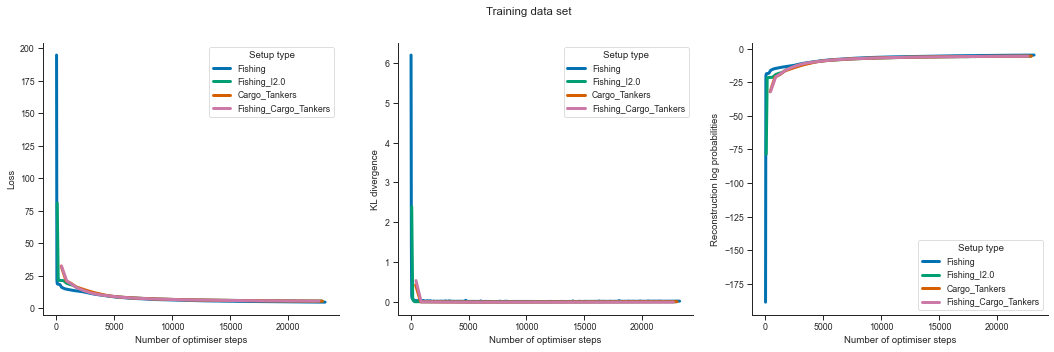

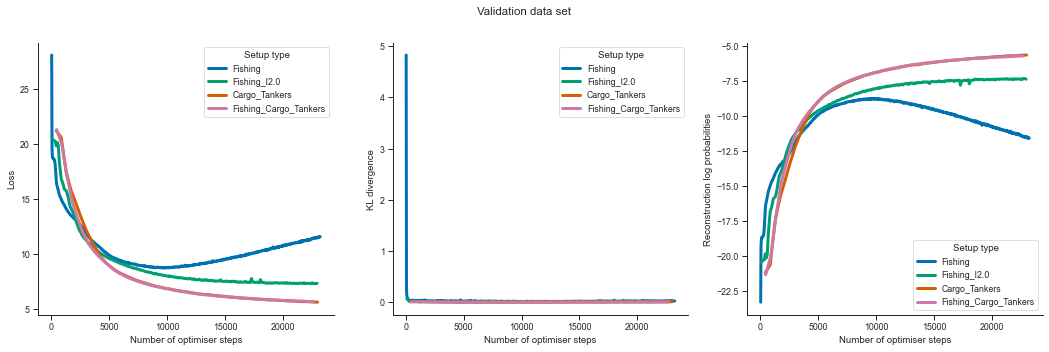

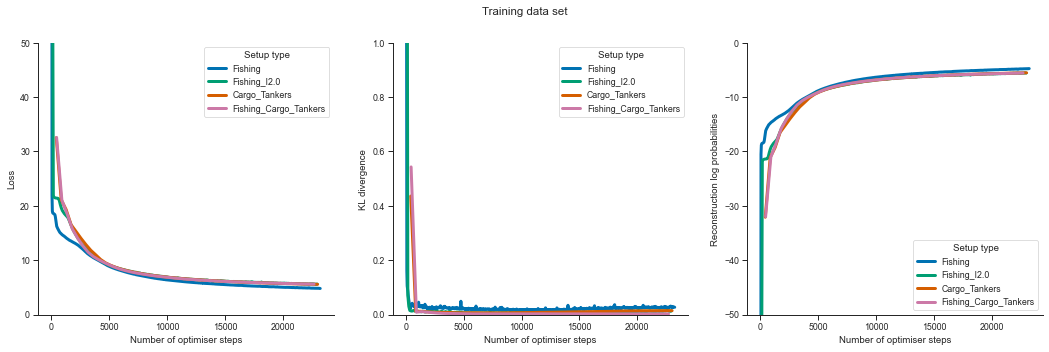

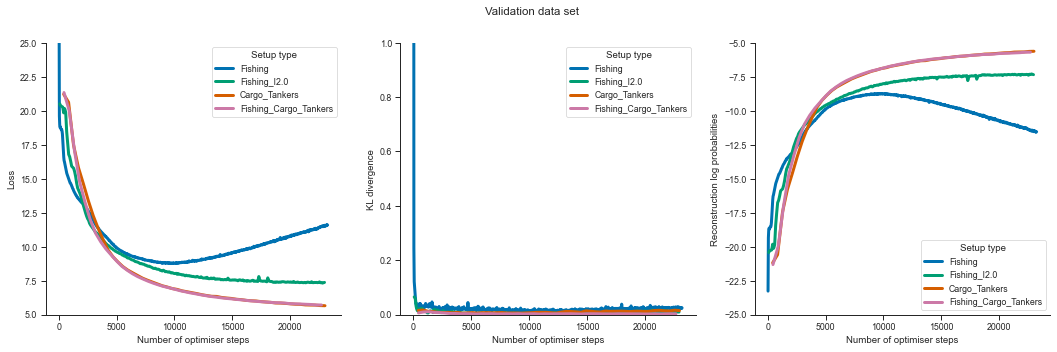

In [3]:
# Use the SummaryModels class
df_default_fish = summary_models_fish.load_curves_df("Fishing", level="Step")
df_fish_i20 = summary_models_fish_i20.load_curves_df("Fishing_I2.0", level="Step")

df_default_carg_tank = summary_models_carg_tank.load_curves_df("Cargo_Tankers", level="Step")
df_default_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df("Fishing_Cargo_Tankers", level="Step")

# Combine the different vessel type date frames 
df = pd.concat([df_default_fish,df_fish_i20, df_default_carg_tank, df_default_fish_carg_tank])
df.reset_index(drop=True, inplace=True)

# Plot the learning curves
x="Number of optimiser steps"
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, x=x, title="Training data set")
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, x=x, title="Validation data set")

# Zoom in
ylims = [(4, 30), (0, 0.1), (-30, -4)]
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, x=x, title="Training data set",
                                          ylims=[(0, 50), (0, 1), (-50, 0)])
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, x=x,
                                          title="Validation data set", ylims=[(5, 25), (0, 1), (-25, -5)])

#### Tajectory (sum of points) and equally weighted point based reconstruction log probabilities for fishing, cargo and tanker vessels

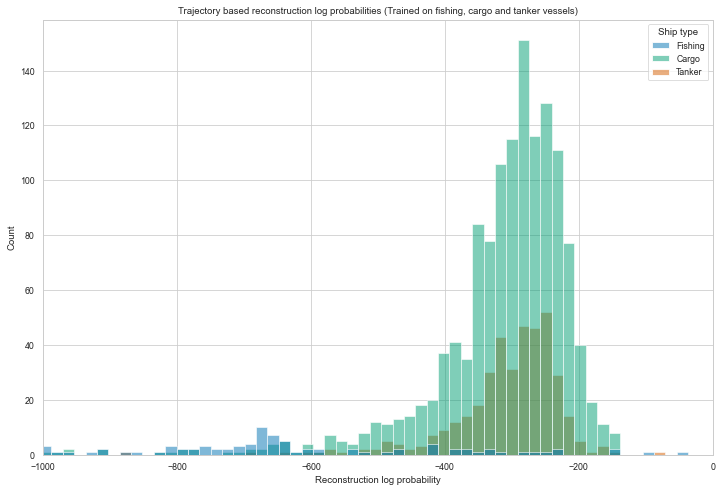

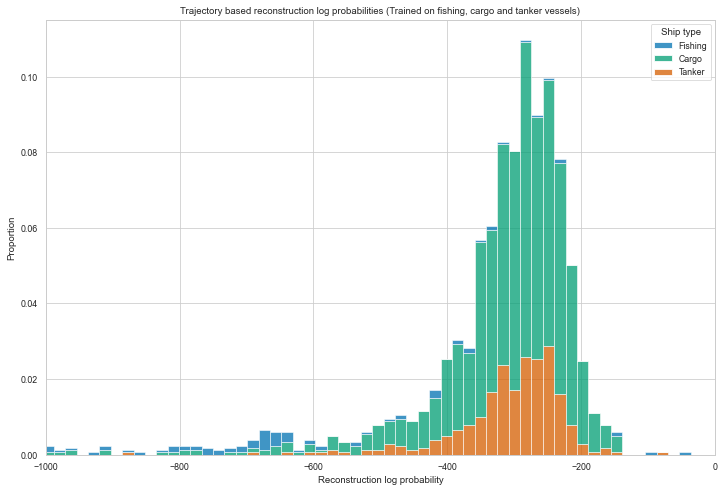

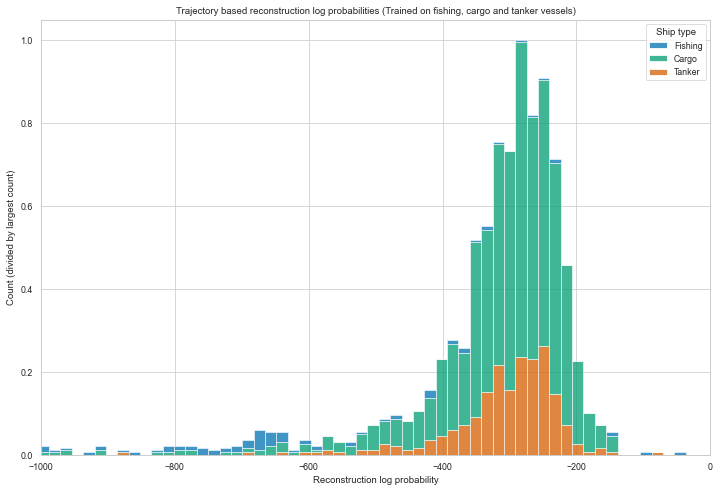

Mean Reconstruction log probability: -346.03073709871484
Median Reconstruction log probability: -296.13714599609375
Reconstruction log probability statistics by ship type: 
            count        mean         std          min         25%  \
Ship type                                                            
Cargo      1310.0 -318.094068  130.159345 -1771.321777 -346.131615   
Fishing     113.0 -778.169828  370.052429 -1870.633545 -993.803467   
Tanker      392.0 -314.819817  121.177468 -1524.532959 -337.004608   

                  50%         75%         max  
Ship type                                      
Cargo     -290.719406 -247.696693 -139.107895  
Fishing   -696.214600 -591.646362  -36.649368  
Tanker    -290.860504 -255.070930  -81.164062  


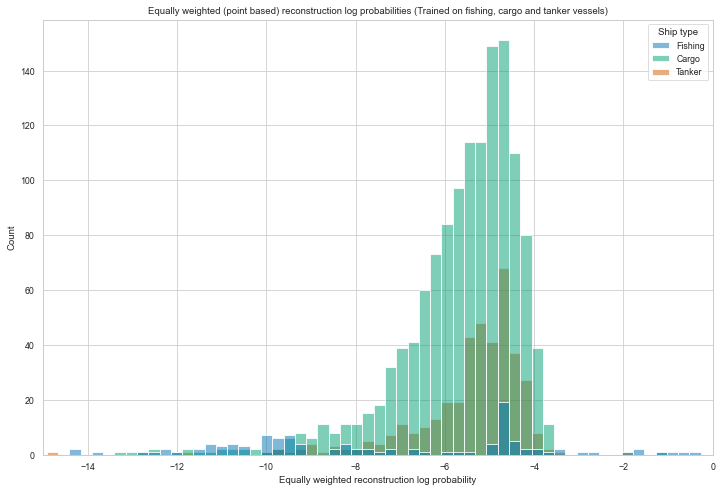

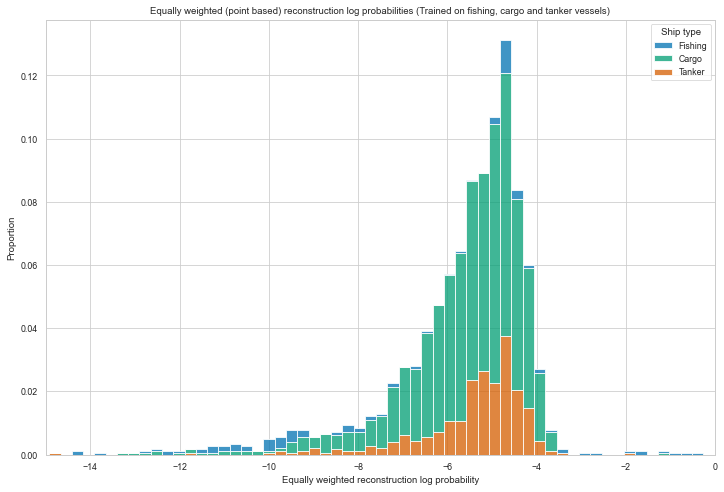

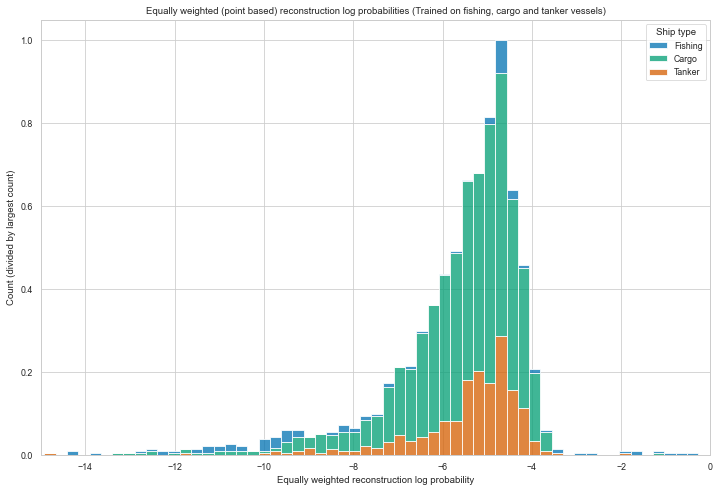

Mean Equally weighted reconstruction log probability: -5.698322183835695
Median Equally weighted reconstruction log probability: -5.260515848795573
Equally weighted reconstruction log probability statistics by ship type: 
            count      mean       std        min       25%       50%  \
Ship type                                                              
Cargo      1310.0 -5.616711  1.347071 -13.318209 -6.183818 -5.322303   
Fishing     113.0 -7.572936  3.490623 -16.432576 -9.920959 -8.088343   
Tanker      392.0 -5.430668  1.285869 -14.801291 -5.795123 -5.113925   

                75%       max  
Ship type                      
Cargo     -4.705998 -1.278091  
Fishing   -4.662908 -0.271477  
Tanker    -4.655142 -1.844638  

 Look at some length statistics:
            count        mean        std   min   25%    50%     75%    max
Ship type                                                                 
Cargo      1310.0   57.541221  17.253010  25.0  45.0   57.0   67.00  142.

In [4]:
hue = "Ship type"
hue_order = ["Fishing", "Cargo", "Tanker"]

# Plot trajectory based reconstruction log probabilities for fishing, cargo and tanker vessels - Zoomed in
title = "Trajectory based reconstruction log probabilities (Trained on fishing, cargo and tanker vessels)"
x = "Reconstruction log probability"
xlim = [-1000, 0]
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Histogram", 
                                                title=title, x=x, hue=hue, hue_order=hue_order, xlim=xlim)
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Stacked", x=x, hue=hue, 
                                                title=title, hue_order=hue_order, xlim=xlim, stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Stacked", x=x, hue=hue, 
                                                title=title, hue_order=hue_order, xlim=xlim, print_summary_stats=True,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")

# Plot equally weighted (point based) reconstruction log probabilities for fishing, cargo and tanker vessels - Zoomed in
title = "Equally weighted (point based) reconstruction log probabilities (Trained on fishing, cargo and tanker vessels)"
x = "Equally weighted reconstruction log probability"
xlim = [-15, 0]
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Histogram",
                                                title=title, x=x, hue=hue, hue_order=hue_order, xlim=xlim)
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Stacked", x=x, hue=hue,
                                                title=title, hue_order=hue_order, xlim=xlim, stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Stacked", x=x, hue=hue, 
                                                title=title, hue_order=hue_order, xlim=xlim, print_summary_stats=True,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")

print("\n Look at some length statistics:")
print(df_track_lvl_fish_carg_tank.groupby("Ship type")["Length"].describe())

#### Tajectory (sum of points) and equally weighted point based reconstruction log probabilities for fishing vessels

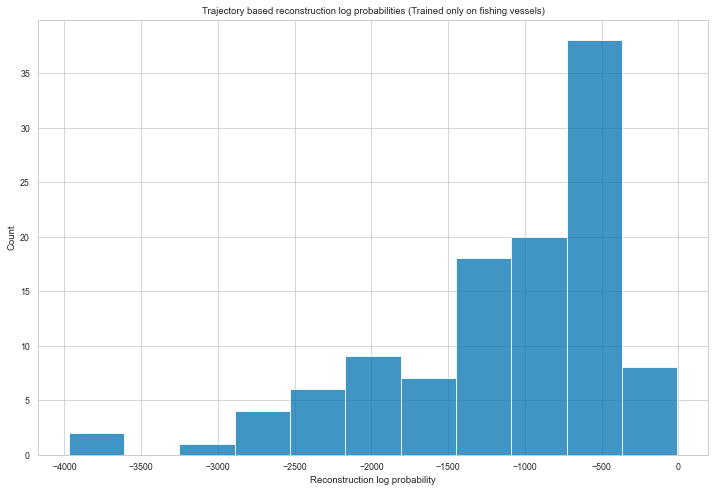

Mean Reconstruction log probability: -1119.3256446070375
Median Reconstruction log probability: -918.91455078125
Reconstruction log probability statistics by ship type: 
           count         mean        std          min          25%  \
Ship type                                                            
Fishing    113.0 -1119.325645  768.06183 -3971.905273 -1482.392578   

                  50%         75%       max  
Ship type                                    
Fishing   -918.914551 -596.614746 -5.708085  


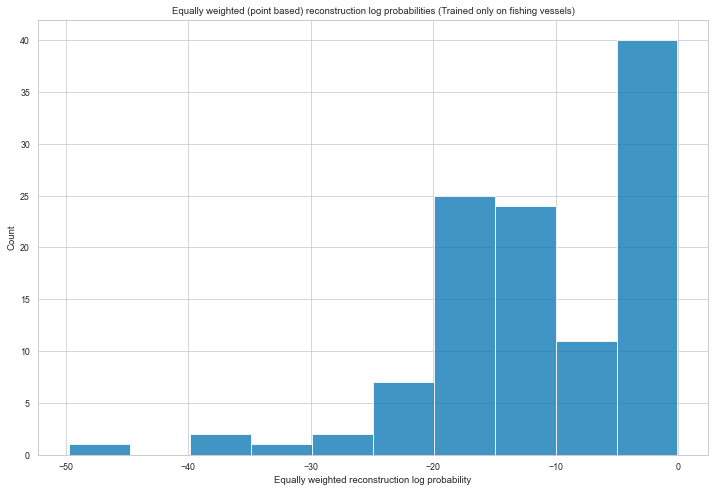

Mean Equally weighted reconstruction log probability: -11.556009430554832
Median Equally weighted reconstruction log probability: -11.717328389485678
Equally weighted reconstruction log probability statistics by ship type: 
           count       mean       std        min        25%        50%  \
Ship type                                                                
Fishing    113.0 -11.556009  8.434571 -49.770571 -16.348538 -11.717328   

                75%       max  
Ship type                      
Fishing   -4.292307 -0.042282  

 Look at some length statistics for fishing vessels only training data set:
           count        mean        std   min   25%    50%    75%    max
Ship type                                                               
Fishing    113.0  111.699115  34.560993  30.0  86.0  124.0  141.0  144.0


In [5]:
# Plot trajectory based reconstruction log probabilities for fishing vessels
title = "Trajectory based reconstruction log probabilities (Trained only on fishing vessels)"
x = "Reconstruction log probability"
summary_models_fish.hist_stacked_plot(df_track_lvl_fish, type="Histogram", x=x, title=title, print_summary_stats=True)

# Plot equally weighted (point based) reconstruction log probabilities for fishing vessels
title = "Equally weighted (point based) reconstruction log probabilities (Trained only on fishing vessels)"
x = "Equally weighted reconstruction log probability"
summary_models_fish.hist_stacked_plot(df_track_lvl_fish, type="Histogram", x=x, title=title, print_summary_stats=True)

print("\n Look at some length statistics for fishing vessels only training data set:")
print(df_track_lvl_fish.groupby("Ship type")["Length"].describe())

#### Tajectory (sum of points) and equally weighted point based reconstruction log probabilities for fishing vessels - Comparison

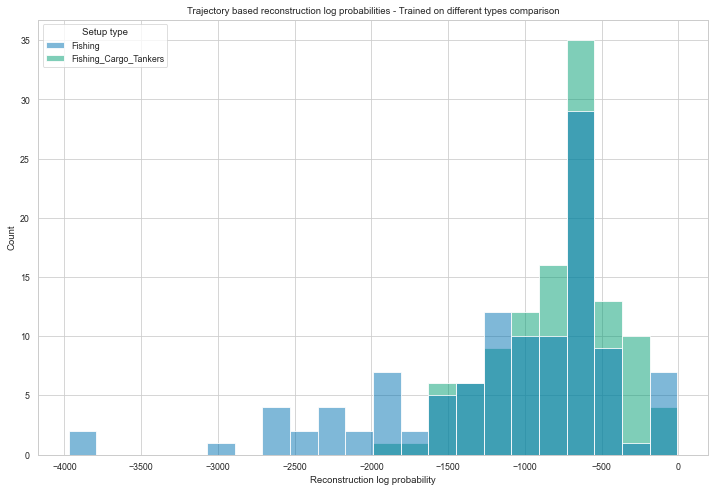

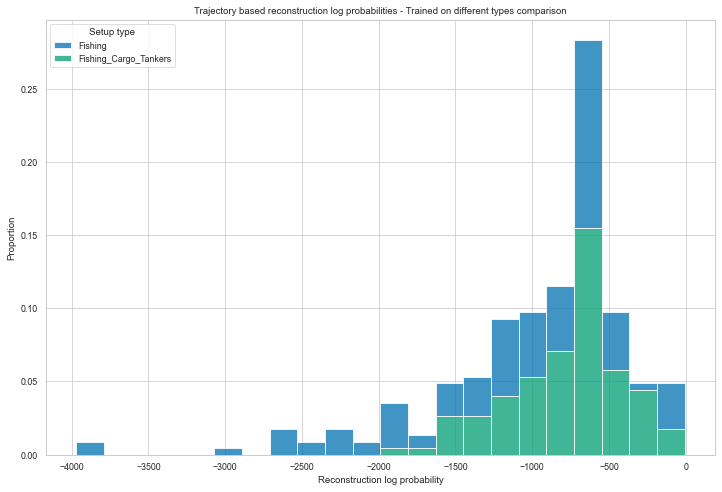

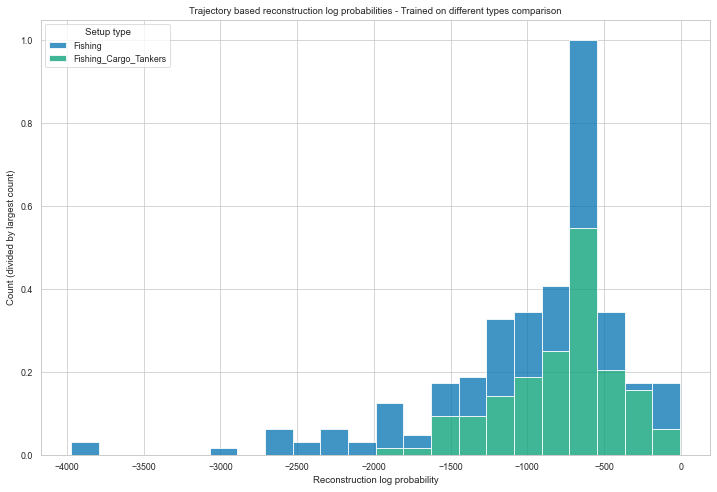

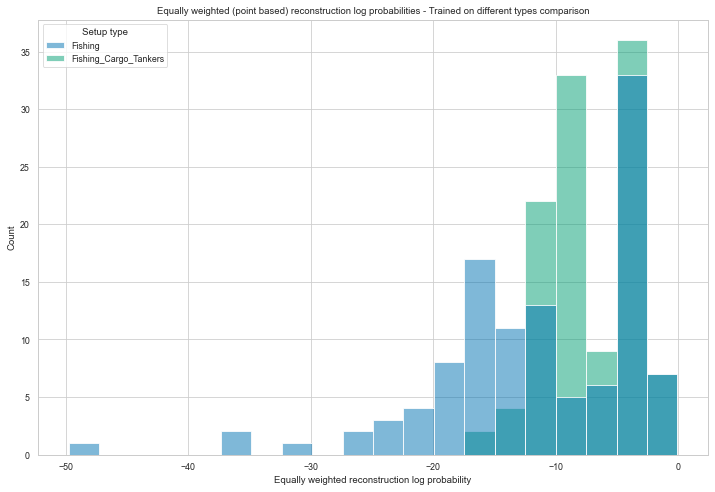

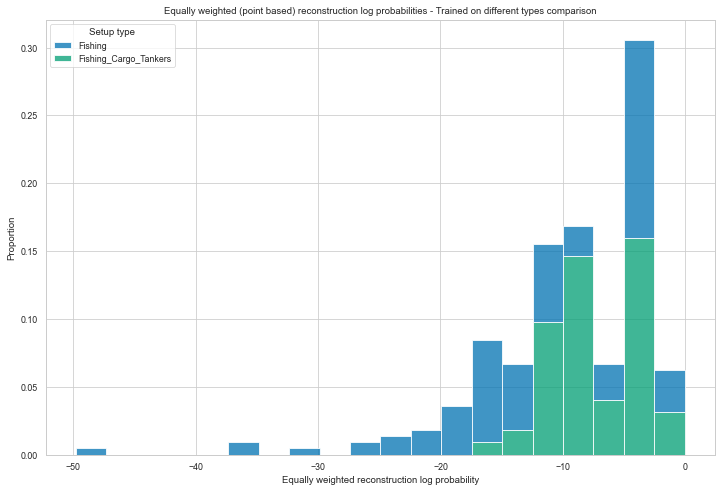

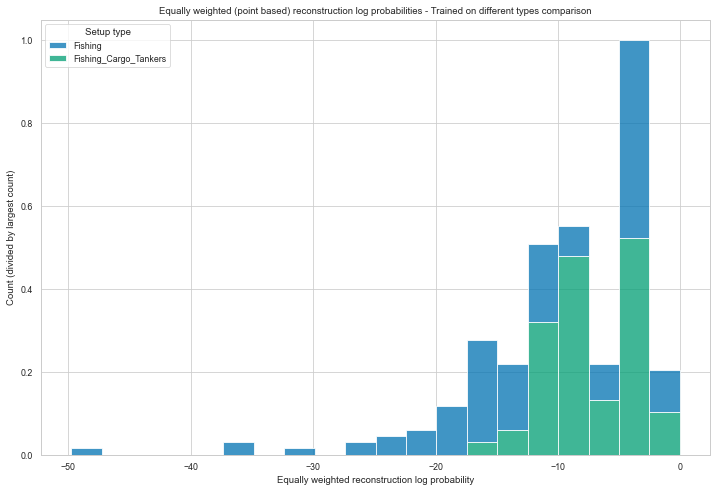

In [6]:
# Combine the different vessel type date frames (that validated on any fishing vessels)
df_all_fish = df_track_lvl_fish_carg_tank[df_track_lvl_fish_carg_tank["Ship type"] == "Fishing"]
df = pd.concat([df_all_fish, df_track_lvl_fish])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Fishing", "Fishing_Cargo_Tankers"]

# Plot trajectory based reconstruction log probabilities for fishing vessels
title = "Trajectory based reconstruction log probabilities - Trained on different types comparison"
x = "Reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Histogram", title=title, x=x, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Stacked", x=x, hue=hue, title=title, hue_order=hue_order, 
                                                stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Stacked", x=x, hue=hue, title=title, hue_order=hue_order,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")

# Plot equally weighted (point based) reconstruction log probabilities for fishing vessels
title = "Equally weighted (point based) reconstruction log probabilities - Trained on different types comparison"
x = "Equally weighted reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Histogram", title=title, x=x, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Stacked", x=x, hue=hue, title=title, hue_order=hue_order,
                                                stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Stacked", x=x, hue=hue, title=title, hue_order=hue_order,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")

# Annealed Kullback–Leibler 

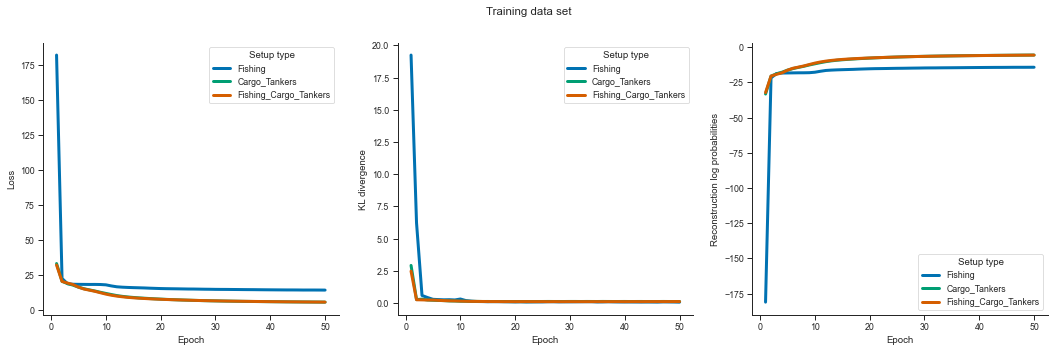

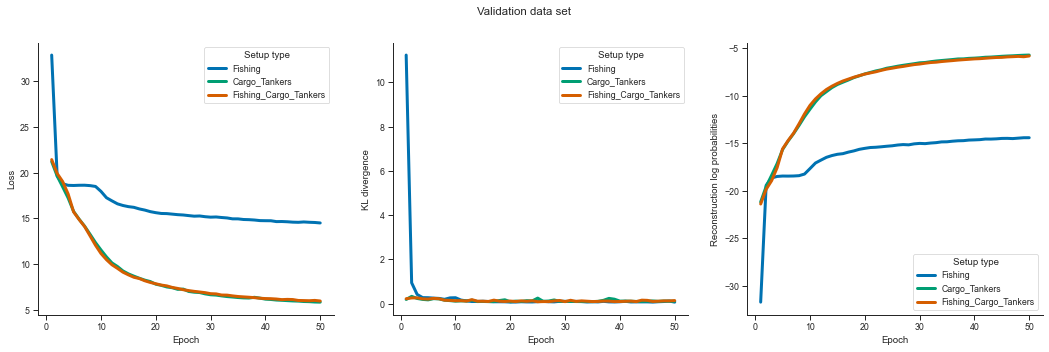

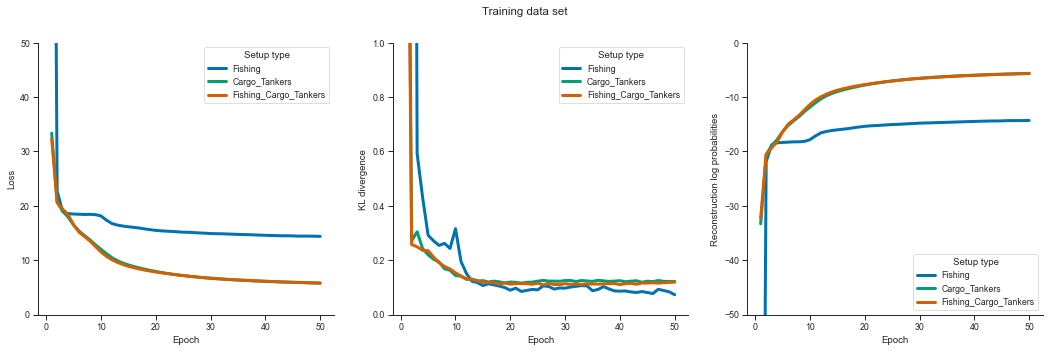

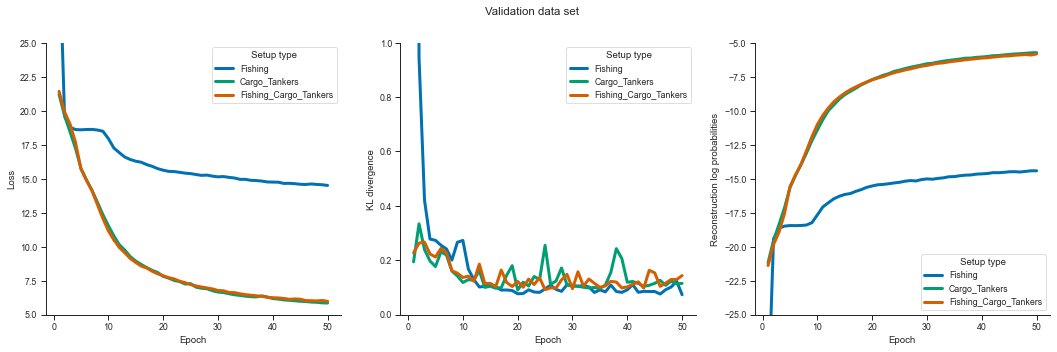

In [7]:
# Use the SummaryModels class
summary_models = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600", kl_annealing=True)
df_annealing_fish = summary_models.load_curves_df("Fishing")
summary_models = SummaryModels("RegionBornholm_01062019_30092019_CargTank_14400_86400_600", kl_annealing=True)
df_annealing_carg_tank = summary_models.load_curves_df("Cargo_Tankers")
summary_models = SummaryModels("RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600", kl_annealing=True)
df_annealing_fish_carg_tank = summary_models.load_curves_df("Fishing_Cargo_Tankers")

# Combine the different vessel type date frames 
df = pd.concat([df_annealing_fish, df_annealing_carg_tank, df_annealing_fish_carg_tank])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Fishing", "Cargo_Tankers", "Fishing_Cargo_Tankers"]

# Plot the learning curves
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Zoom in
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                           ylims=[(0, 50), (0, 1), (-50, 0)])
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set",
                           ylims=[(5, 25), (0, 1), (-25, -5)])